In [1]:
# Huasong Fu
# 5765186044

# import library
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

## Pick the following 3 settings
1. Simulate a DGP where the outcome of interest depends on a randomly assigned treatment and
some observed covariates.
2. Simulate a DGP with a confounder (common cause)
3. Simulate a DGP with selection bias into the treatment (variable in between the path from the
treatment to the outcome)

## 1. Simulate a DGP with a random and some observed covariates

### 1.1. simulate a DGP

Text(0, 0.5, 'outcome')

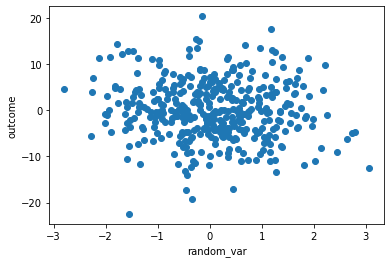

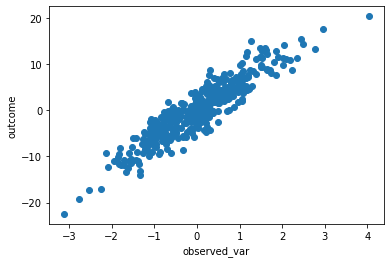

In [3]:
row = 400
col = 5
random_var = np.random.randn(row, 1)
observed_var = np.random.randn(row, 3)
outcome = 1.2 * observed_var[:, 0] + 2.2 * observed_var[:, 1] + 5.8 * observed_var[:, 2]
# so the outcome depands on a randomly assigned treament and some observed covars

plt.figure()
plt.scatter(random_var, outcome)
plt.xlabel("random_var")
plt.ylabel("outcome")

plt.figure()
plt.scatter(observed_var[:, 2], outcome)
plt.xlabel("observed_var")
plt.ylabel("outcome")


### 1.2. DAG
there are three backdoor paths

observed_var1 -> outcome

observed_var2 -> outcome

observed_var3 -> outcome

### 1.3. Show bias and RMSE

When n = 100 and control for the covariate, the rmse is 11.01113040553931 and the bias is -8.948397578478762e-14
When n = 100 and fail to control for the covariate, the rmse is 59.76527969973136 and the bias is -2.1760371282653068e-14
When n = 1000 and control for the covariate, the rmse is 37.920010380666014 and the bias is 2.6645352591003757e-14
When n = 1000 and fail to control for the covariate, the rmse is 205.38580129004743 and the bias is 0.0


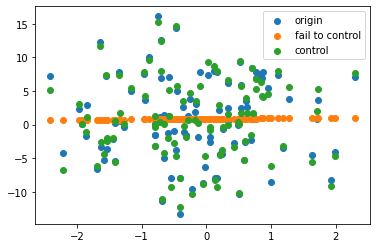

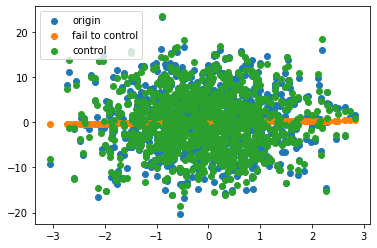

In [7]:
def get_bias_and_rmse(y1, y2):
    bias = (y1-y2).sum()
    rmse = ((y1 - y2) ** 2).sum() ** 0.5
    return bias, rmse


def simulate(N):
    random_var = np.random.randn(N, 1)
    observed_var = np.random.randn(N, 3)
    outcome = 1.2 * observed_var[:, 0] + 2.2 * observed_var[:, 1] + 5.8 * observed_var[:, 2]
    x = np.hstack((observed_var[:, 1:], random_var))
    mode1 = linear_model.LinearRegression()
    mode1.fit(x, outcome)
    bias1, rmse1 = get_bias_and_rmse(outcome, mode1.predict(x))
    y1 = mode1.predict(x)
    print("When n = {} and control for the covariate, the rmse is {} and the bias is {}".format(N, rmse1, bias1))
    mode1 = linear_model.LinearRegression()
    mode1.fit(random_var, outcome)
    bias1, rmse1 = get_bias_and_rmse(outcome, mode1.predict(random_var))
    print("When n = {} and fail to control for the covariate, the rmse is {} and the bias is {}".format(N, rmse1, bias1))
    plt.figure()
    plt.scatter(random_var, outcome, label = "origin")
    plt.scatter(random_var, mode1.predict(random_var), label = "fail to control")
    plt.scatter(random_var, y1, label = "control")
    plt.legend()

simulate(100)
simulate(1000)

### 1.4. Example
For example, each person's income is affected by education and country, but has little to do with today's weather.

## 2. Simulate a DGP with a confounder (common cause)

### 2.1. simulate a DGP

Text(0, 0.5, 'outcome')

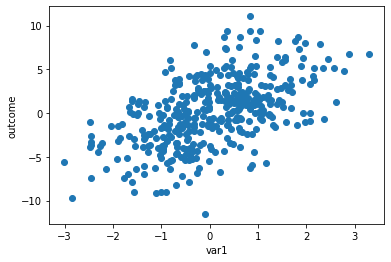

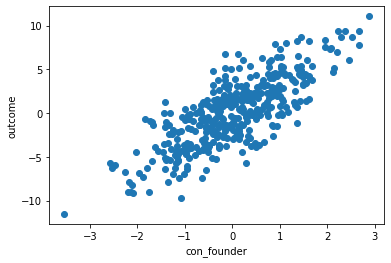

In [8]:
con_founder = np.random.randn(row, 1)
var1 = np.random.randn(row, 1) - 0.1 * con_founder
outcome = 3.2 * con_founder + 2.2 * var1
# so the outcome and var1 has common founder， con_founder

plt.figure()
plt.scatter(var1, outcome)
plt.xlabel("var1")
plt.ylabel("outcome")

plt.figure()
plt.scatter(con_founder, outcome)
plt.xlabel("con_founder")
plt.ylabel("outcome")

### 2.2. DAG
there are two backdoor paths

con_founder -> var1 -> outcome

con_founder -> outcome

### 2.3. Show bias and RMSE

When n = 100 and control for the confounder, the rmse is 1.2413725798414534e-14 and the bias is 1.3378187446733136e-14
When n = 100 and fail to control for the confounder, the rmse is 30.623883861888995 and the bias is 1.509903313490213e-14
When n = 1000 and control for the confounder, the rmse is 3.476724888126145e-14 and the bias is -2.569819357312042e-14
When n = 1000 and fail to control for the confounder, the rmse is 102.4359199919617 and the bias is -7.105427357601002e-14


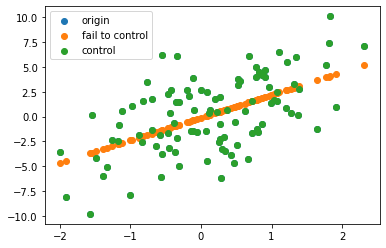

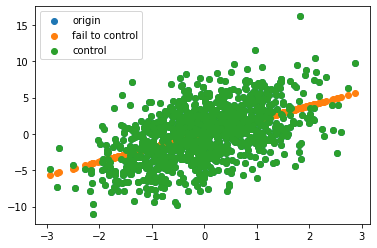

In [9]:
def get_bias_and_rmse(y1, y2):
    bias = (y1-y2).sum()
    rmse = ((y1 - y2) ** 2).sum() ** 0.5
    return bias, rmse


def simulate(N):
    con_founder = np.random.randn(N, 1)
    var1 = np.random.randn(N, 1) - 0.1 * con_founder
    outcome = 3.2 * con_founder + 2.2 * var1
    x = np.hstack((con_founder, var1))
    mode1 = linear_model.LinearRegression()
    mode1.fit(x, outcome)
    bias1, rmse1 = get_bias_and_rmse(outcome, mode1.predict(x))
    y1 = mode1.predict(x)
    print("When n = {} and control for the confounder, the rmse is {} and the bias is {}".format(N, rmse1, bias1))
    mode1 = linear_model.LinearRegression()
    mode1.fit(var1, outcome)
    bias1, rmse1 = get_bias_and_rmse(outcome, mode1.predict(var1))
    print("When n = {} and fail to control for the confounder, the rmse is {} and the bias is {}".format(N, rmse1, bias1))
    plt.figure()
    plt.scatter(var1, outcome, label = "origin")
    plt.scatter(var1, mode1.predict(var1), label = "fail to control")
    plt.scatter(var1, y1, label = "control")
    plt.legend()

# we can see outcome can be predict very well from var1 and con_founder beacuse it is linear with the two variable
# and it is not good to predict outcome with only var1
simulate(100)
simulate(1000)

### 2.4. Example
For example, each person's income is affected by education and family situation, and family situation will also affect education.

## 3. Simulate a DGP with a selection bias
### 3.1. Simulat a DGP

Text(0, 0.5, 'effect')

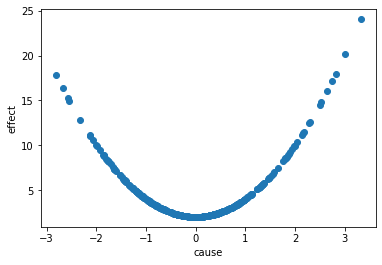

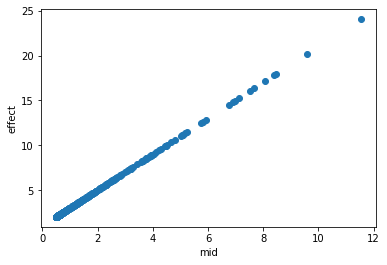

In [10]:
x1 = np.random.randn(row, 1)
x2 = x1 ** 2 + 0.5
y = x2 * 2 + 1

# x2 is variable in between the path from cause to effect

plt.figure()
plt.scatter(x1, y)
plt.xlabel("cause")
plt.ylabel("effect")

plt.figure()
plt.scatter(x2, y)
plt.xlabel("mid")
plt.ylabel("effect")

### 3.2. DAG
x1 -> x2 -> y

### 3.3. Show bias and RMSE

When n = 100 and control for the variable in middle, the rmse is 2.1413940824622166 and the bias is 7.038813976123492e-14
When n = 100 and fail to control for the variable in middle, the rmse is 29.41139911072671 and the bias is 1.7763568394002505e-15
When n = 1000 and control for the variable in middle, the rmse is 6.274598593603828 and the bias is -2.070787985530842e-12
When n = 1000 and fail to control for the variable in middle, the rmse is 90.53610832457831 and the bias is -1.7053025658242404e-13


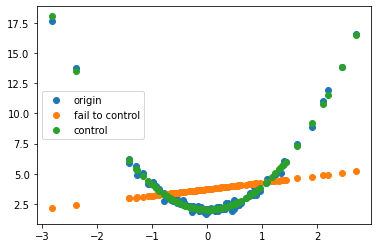

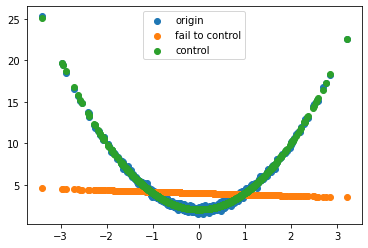

In [12]:
def get_bias_and_rmse(y1, y2):
    bias = (y1-y2).sum()
    rmse = ((y1 - y2) ** 2).sum() ** 0.5
    return bias, rmse


def simulate(N):
    x1 = np.random.randn(N, 1)
    x2 = x1 ** 2 + 0.5
    y = x2 * 2 + 1 + np.random.randn(N, 1) * 0.2
    x = np.hstack((x1, x2))
    mode1 = linear_model.LinearRegression()
    mode1.fit(x, y)
    bias1, rmse1 = get_bias_and_rmse(y, mode1.predict(x))
    y1 = mode1.predict(x)
    print("When n = {} and control for the variable in middle, the rmse is {} and the bias is {}".format(N, rmse1, bias1))
    mode1 = linear_model.LinearRegression()
    mode1.fit(x1, y)
    bias1, rmse1 = get_bias_and_rmse(y, mode1.predict(x1))
    print("When n = {} and fail to control for the variable in middle, the rmse is {} and the bias is {}".format(N, rmse1, bias1))
    plt.figure()
    plt.scatter(x1, y, label = "origin")
    plt.scatter(x1, mode1.predict(x1), label = "fail to control")
    plt.scatter(x1, y1, label = "control")
    plt.legend()

simulate(100)
simulate(1000)

### 3.4. Example
For example, each person's education will affect his income, and his income will affect shopping preferences, so education will have some impact on shopping preferences